<a href="https://colab.research.google.com/github/buadeoye/400-Birds-Species-Classification/blob/main/BigDataProject_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**The Dataset**
Dataset of 400 bird species containing 62388 images. The data was downloaded from Kaggle (Kaggle, 2022). All images are 224 X 224 X 3 color images in jpg format. Data set includes a train set, test set and validation set. Each set contains 400 sub directories, one for each bird species. 

Statement of Problem
The objective of this project was to apply Convolution Neural Network algorithm to classify the species of birds in the dataset obtained from Kaggle. 
Analysis
The Dataset was read into Google Colab and simple Exploratory Data Analysis EDA was conducted to check for the size of the dataset, the null values, the top layers of the data etc. 
Thereafter, a class of the dataset was selected from the data. The summary is :
Total number of images: 1689
Total number of classes: 10
Number of training set images: 1589
Number of test set images: 50
Number of validation set images: 50


In [2]:
!pip install tensorflow==2.7

     |████████████████████████████████| 489.6 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 45.8 MB/s 
     |████████████████████████████████| 463 kB 55.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


In [3]:
! pip install kaggle

In [4]:
! pip install kaggle

In [5]:
#Make a directory kaggle
! mkdir ~/.kaggle

In [6]:
#Copy the kaggle credential(in json format)
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
#Allocating the required permissions 
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Downloading the project dataset from kaggle
! kaggle datasets download gpiosenka/100-bird-species

 99% 1.49G/1.49G [00:19<00:00, 40.1MB/s]
100% 1.49G/1.49G [00:20<00:00, 79.9MB/s]


In [9]:
# I need to unzip the file here
! unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflating: train

In [10]:
# Importing pandas and reading the data to file. Thereafter view the data.

import pandas as pd

train_file = "/content/birds.csv"
raw_data = pd.read_csv(train_file)

#To see the top level of the dataset

raw_data.head()


,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [11]:
#To know the size of the dataset

print(raw_data.shape)

(62388, 4)


In [12]:
#To view the data sample

print(raw_data.sample(10))

       class index                        filepaths             labels  \
57546          394        train/WILD TURKEY/086.jpg        WILD TURKEY   
39979          275   train/NORTHERN GOSHAWK/086.jpg   NORTHERN GOSHAWK   
894              5  train/AFRICAN FIREFINCH/087.jpg  AFRICAN FIREFINCH   
15987          110   train/CHUKAR PARTRIDGE/061.jpg   CHUKAR PARTRIDGE   
50349          347         train/SNOWY EGRET/04.jpg        SNOWY EGRET   
38060          262    train/MANGROVE CUCKOO/014.jpg    MANGROVE CUCKOO   
52315          360   train/STRIPPED MANAKIN/025.jpg   STRIPPED MANAKIN   
3173            20       train/ANDEAN GOOSE/130.jpg       ANDEAN GOOSE   
30164          208     train/HARLEQUIN DUCK/052.jpg     HARLEQUIN DUCK   
45762          315           train/RED FODY/041.jpg           RED FODY   

      data set  
57546    train  
39979    train  
894      train  
15987    train  
50349    train  
38060    train  
52315    train  
3173     train  
30164    train  
45762    train 

In [13]:
#To know if there is any empty or null values in the dataset

raw_data.isnull().sum()

class index    0
filepaths      0
labels         0
data set       0
dtype: int64

SUMMARY OF THE DATASET

There are 62,388 different species of birds. The file has 4 columns showing class index, filepaths, labels and data set. The data sets are classified into Train, Test and Validation. There are no null values in the data set.



In [14]:
# Installing utils library
!pip install utils

In [15]:
# Importing more libraries

import numpy as np
import pandas as pd
import cv2
import utils
import os

In [16]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D , BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras

In [17]:
# Reading in the train, test and validation data

train_directory='/content/train'
test_directory='/content/test'
val_directory='/content/valid'

In [18]:
# Setting up a function to read the classes of the birds

classes = ["ABBOTTS BABBLER", "ALBATROSS", "BOBOLINK","CERULEAN WARBLER", "COCKATOO", "FAIRY BLUEBIRD", "HYACINTH MACAW", "MALACHITE KINGFISHER", "PURPLE SWAMPHEN", "GUINEA TURACO"]
IMG_SIZE = 112
def get_dataset(data_dir):
    x = []
    y = [] 
    for label in classes: 
        path = os.path.join(data_dir, label)
        class_num = classes.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                x.append(resized_arr)
                y.append(class_num)
            except Exception as e:
                print(e)

    return np.array(x), np.array(y)

In [19]:
#Setting up the Train, Test and Validation Samples

train_X,train_y = get_dataset(train_directory)
test_X,test_y = get_dataset(test_directory)
valid_X,valid_y = get_dataset(val_directory)

In [20]:
# Print the details of the images, classes, training set, and validation set.

print("Total number of images:", train_X.shape[0] + test_X.shape[0] + valid_X.shape[0])
print("Total number of classes:", len(classes))
print("Number of training set images:", train_X.shape[0])
print("Number of test set images:", test_X.shape[0])
print("Number of validation set images:", valid_X.shape[0])

Total number of images: 1689
Total number of classes: 10
Number of training set images: 1589
Number of test set images: 50
Number of validation set images: 50


In [21]:
# The shape of the train_set

print(train_X.shape[1:])

(112, 112, 3)


In [22]:
# Shuffle images for visualization (images were loaded sequentially by type):
print("Before:", train_y[:10])
train_X, train_y = shuffle(train_X, train_y, random_state=48)
print("After:", train_y[:10])

Before: [0 0 0 0 0 0 0 0 0 0]
After: [1 2 7 3 9 8 9 1 1 5]


In [23]:
def show_example(train_x, train_y, class_names):
    plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_x[i])
        plt.xlabel(class_names[train_y[i]])
    plt.show()

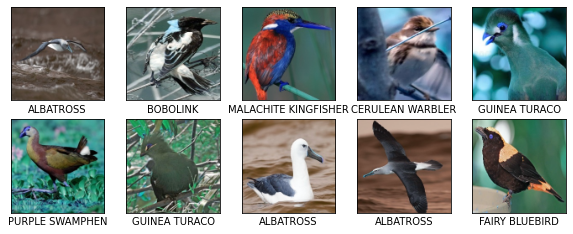

In [24]:
# Samples of birds 
show_example(train_X, train_y, classes)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


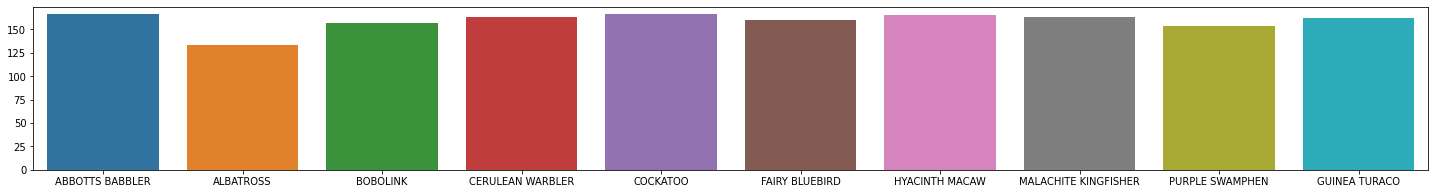

In [25]:
# To check for the spread of the classes  
plt.figure(figsize=(25,3))
ax = sns.barplot(classes, np.bincount(train_y))
plt.show()

In [26]:

# First to normalize the values ​​of the images on a scale of 0-1

train_X = train_X/255.0
test_X = test_X/255.0
valid_X = valid_X/255.0

In [27]:
# Augmentation and Editing of images

train_gen = ImageDataGenerator(
        rotation_range = 60,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)
train_gen.fit(train_X)

valid_gen = ImageDataGenerator(
        rotation_range = 60,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)
valid_gen.fit(valid_X)

In [28]:
# To use the classes in the model, one-hot encoding was used:

train_y = tf.keras.utils.to_categorical(train_y, len(classes))
test_y = tf.keras.utils.to_categorical(test_y, len(classes))
valid_y = tf.keras.utils.to_categorical(valid_y, len(classes))

In [29]:
# Sample one-hot encoded classes
train_y[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [30]:
# Model Training

def show_history(history):
    plt.figure(figsize=(20,20))
    plt.subplot(5,5,1)
    for key in ["val_loss","loss"]:
        plt.plot(history.epoch, history.history[key], label=key)
    plt.legend()
    plt.subplot(5,5,2)
    for key in ["val_accuracy","accuracy"]:
        plt.plot(history.epoch, history.history[key], label=key)
    plt.legend()
    plt.tight_layout()
    plt.show()

The Model is sequential with 3 Convolution layers in total but MaxPooling is applied after each layer and BatchNormalization after the 2nd layer. Max pooling is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.
The Activation Function deployed was ReLU(Rectified Linear Activation Function) which helps to account for non-linearity in the input so as to make the model perform better. Each Convolution has depth of 16, 16 and with kernel size of 3 by 3. 
The Flatten layer was added to convert the multi-dimensions tensors to a single dimension which enables the data to pass through each neuron of the model.The Dense Layer was also added with depth of 64, and activation function used at this layer was ReLU. But at the final Dense Layer, the Activation Function applied as softmax.The softmax activation is normally applied to the very last layer in a neural network, instead of using ReLU, sigmoid, tanh, or another activation function. The reason why softmax is useful is because it converts the output of the last layer in the neural network into what is essentially a probability distribution. Padding(SAME) was used to ensure that the output size is the same as the input size(when stride=1). Then the Dropout randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. It was set at 0.3. This is applied after the 3rd Convolution Layer and after the 2 Dense Layer. The Optimizer used was Adam and the metrics applied as Accuracy.


In [31]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(train_X.shape[1:])))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(len(classes), activation='softmax'))
model.summary()
model.compile(loss=keras.losses.CategoricalCrossentropy() , optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                        

In [32]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=70, restore_best_weights=True)
batch_size = 128
epochs = 40 
history = model.fit(train_gen.flow(train_X,train_y), batch_size = batch_size ,epochs = epochs , validation_data = valid_gen.flow(valid_X, valid_y) ,callbacks = [es])

Epoch 1/40
50/50 [==============================] - 37s 692ms/step - loss: 2.0707 - accuracy: 0.2448 - val_loss: 2.2388 - val_accuracy: 0.2600
Epoch 2/40
50/50 [==============================] - 28s 554ms/step - loss: 1.6368 - accuracy: 0.4072 - val_loss: 2.1945 - val_accuracy: 0.4000
Epoch 3/40
50/50 [==============================] - 20s 396ms/step - loss: 1.4511 - accuracy: 0.4808 - val_loss: 2.0349 - val_accuracy: 0.5600
Epoch 4/40
50/50 [==============================] - 20s 397ms/step - loss: 1.3290 - accuracy: 0.5419 - val_loss: 1.9379 - val_accuracy: 0.7000
Epoch 5/40
50/50 [==============================] - 21s 420ms/step - loss: 1.2487 - accuracy: 0.5746 - val_loss: 1.7895 - val_accuracy: 0.6600
Epoch 6/40
50/50 [==============================] - 20s 397ms/step - loss: 1.1979 - accuracy: 0.5872 - val_loss: 1.5876 - val_accuracy: 0.7000
Epoch 7/40
50/50 [==============================] - 20s 397ms/step - loss: 1.1146 - accuracy: 0.6104 - val_loss: 1.4869 - val_accuracy: 0.5000

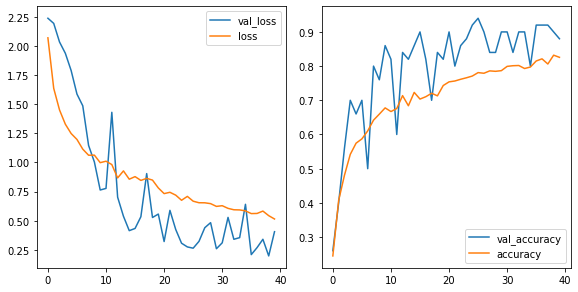

Accuracy: 0.9
                      precision    recall  f1-score   support

     ABBOTTS BABBLER       0.62      1.00      0.77         5
           ALBATROSS       0.83      1.00      0.91         5
            BOBOLINK       1.00      0.80      0.89         5
    CERULEAN WARBLER       1.00      0.80      0.89         5
            COCKATOO       1.00      1.00      1.00         5
      FAIRY BLUEBIRD       1.00      0.80      0.89         5
      HYACINTH MACAW       1.00      1.00      1.00         5
MALACHITE KINGFISHER       1.00      1.00      1.00         5
     PURPLE SWAMPHEN       1.00      0.80      0.89         5
       GUINEA TURACO       0.80      0.80      0.80         5

            accuracy                           0.90        50
           macro avg       0.93      0.90      0.90        50
        weighted avg       0.93      0.90      0.90        50



In [33]:
show_history(history)
y_pred = model.predict(test_X)
predicted=np.argmax(y_pred,axis=1)
print(f'Accuracy: {accuracy_score(y_true=np.argmax(test_y,axis=1), y_pred=predicted)}')
print(classification_report(np.argmax(test_y,axis=1), predicted, target_names = classes))

**Summary**
The Model Accuracy was 94% with F1-score of 94% which gives average of precision value of 95% and recall scores of 94%.


A total of 7 convolution layers - a significant increase in the number of layer filters (from 128 to 1024) - change the structure of these layers first 2 together, then 2 separately by max pooling, 2 together and the last with 1024 filters - higher number of filters with increasing depth Use of standardization 2 dense layers for classification - reducing their size to 128 and 64 Activation function relu + softmax in the last layer Optimizer Adam Batch size 128 and 4
0 epochs

In [34]:
# Model 2 with SDG Optimizer.

modeltest2 = Sequential()
modeltest2.add(Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(train_X.shape[1:])))
modeltest2.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modeltest2.add(MaxPooling2D(4, 4))
modeltest2.add(BatchNormalization())
modeltest2.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modeltest2.add(MaxPooling2D(2, 2))
modeltest2.add(BatchNormalization())
modeltest2.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modeltest2.add(MaxPooling2D(2, 2))
modeltest2.add(BatchNormalization())
modeltest2.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
modeltest2.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
modeltest2.add(MaxPooling2D(2, 2))
modeltest2.add(BatchNormalization())
modeltest2.add(Conv2D(1024, (3, 3), activation="relu", padding="same"))
modeltest2.add(MaxPooling2D(2, 2))
modeltest2.add(BatchNormalization())
modeltest2.add(Flatten())
modeltest2.add(Dense(128, activation="relu"))
modeltest2.add(Dropout(0.15))
modeltest2.add(Dense(64, activation="relu"))
modeltest2.add(Dropout(0.15))
modeltest2.add(Dense(len(classes), activation='softmax'))
modeltest2.compile(loss=keras.losses.CategoricalCrossentropy() , optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=False), metrics=["accuracy"])


In [35]:

es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=70, restore_best_weights=True)
batch_size = 128
epochs = 10
historytest2 = modeltest2.fit(train_gen.flow(train_X,train_y), batch_size = batch_size ,epochs = epochs , validation_data = valid_gen.flow(valid_X, valid_y) ,callbacks = [es])

Epoch 1/10
50/50 [==============================] - 485s 10s/step - loss: 2.3740 - accuracy: 0.2266 - val_loss: 4.6939 - val_accuracy: 0.1200
Epoch 2/10
50/50 [==============================] - 481s 10s/step - loss: 1.8321 - accuracy: 0.3600 - val_loss: 2.1901 - val_accuracy: 0.2600
Epoch 3/10
50/50 [==============================] - 482s 10s/step - loss: 1.6053 - accuracy: 0.4449 - val_loss: 2.1546 - val_accuracy: 0.2000
Epoch 4/10
50/50 [==============================] - 499s 10s/step - loss: 1.4281 - accuracy: 0.5016 - val_loss: 1.2705 - val_accuracy: 0.4400
Epoch 5/10
50/50 [==============================] - 486s 10s/step - loss: 1.2563 - accuracy: 0.5802 - val_loss: 2.0055 - val_accuracy: 0.4000
Epoch 6/10
50/50 [==============================] - 494s 10s/step - loss: 1.1744 - accuracy: 0.6073 - val_loss: 1.5009 - val_accuracy: 0.4400
Epoch 7/10
50/50 [==============================] - 485s 10s/step - loss: 1.1066 - accuracy: 0.6381 - val_loss: 1.1201 - val_accuracy: 0.5200
Epoch 

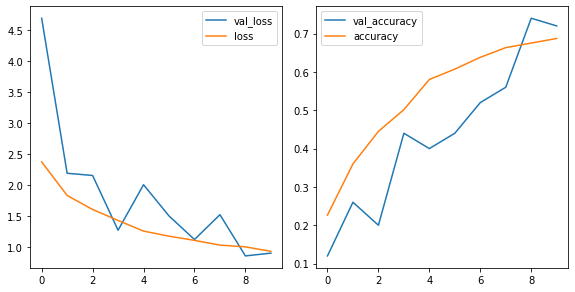

Accuracy: 0.7


In [36]:
show_history(historytest2)
y_pred = modeltest2.predict(test_X)
predicted=np.argmax(y_pred,axis=1)
print(f'Accuracy: {accuracy_score(y_true=np.argmax(test_y,axis=1), y_pred=predicted)}')